# Building and Deploying a Wine Classifier App based on Machine Learning models 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
wine_df = pd.read_csv("winequality-red.csv")

#The dataset is available here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- As you can see above, we have 12 different features such as **fixed acidity**, **citric acid**, **pH**, and more. 

- In this exercise, we'll try to build a classifier model to predict the **quality** of the wines based on the other **11 different features**. 



In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- This shows that there are **no null values** within the dataset and a total number of **1599** records.

# Heatmap and Correlation matrix between the features

<AxesSubplot:>

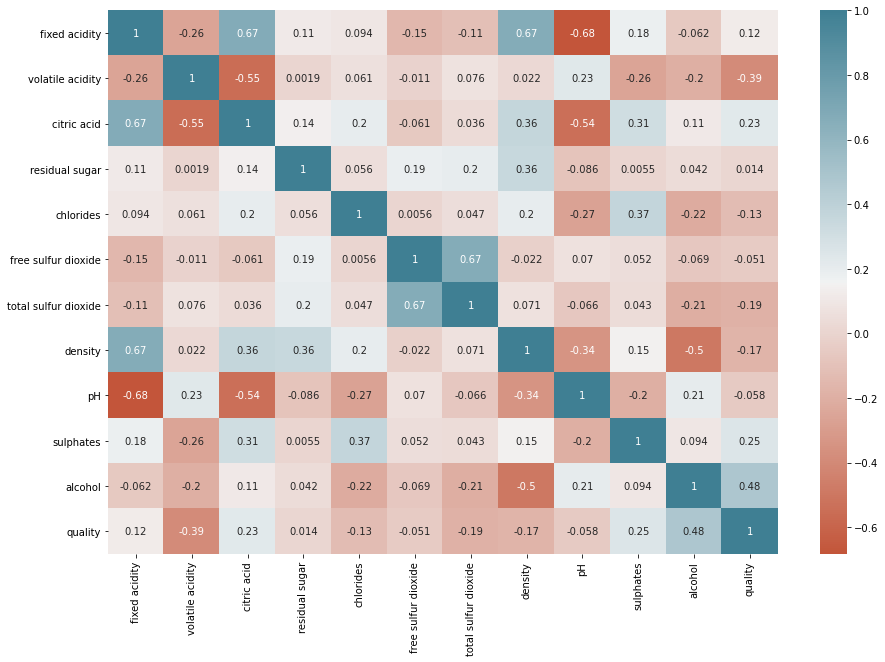

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(wine_df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=256))

<AxesSubplot:>

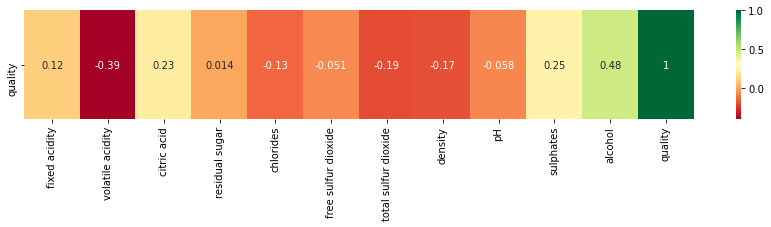

In [6]:
fig, ax = plt.subplots(figsize=(15,2))
sns.heatmap(wine_df.corr().iloc[[11]], annot=True, cmap="RdYlGn")

- The heatmap above shows the correlation between the other features and the **quality**.

- It shows that the **alcohol** content has the highest positive correlation with the **quality** (i.e. the higher the alcohol, the better the quality) and relatively, the **volatile acidity** has a negative correlation with the **quality** (i.e. the lower the volative acidity, the higher the quality). 

# Convert the Wine Quality to Good or Bad

- The task of our classifier is to predict whether the wine quality is good or bad.

In [7]:
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

- The shows that the wine quality in the dataset ranges from 3 to 8. 


- We need to transform the value in this feature to be either ‘good’ or ‘bad’.


- To do this, we need to set certain rules. If the wine quality is equal or greater than 6, then we can classify the quality of the wine as good, otherwise the quality is bad.

In [8]:
wine_df.quality = np.where(wine_df.quality>=6, "Good", "Bad")

In [9]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad


In [10]:
wine_df.quality.value_counts()

Good    855
Bad     744
Name: quality, dtype: int64

- We can see that that there are 855 wines classified as ‘good’ and 744 wines classified as ‘bad’. 

- This proportion seems reasonably balanced and safe to say that we don’t have an imbalanced dataset issue. 

C:\Users\bunmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

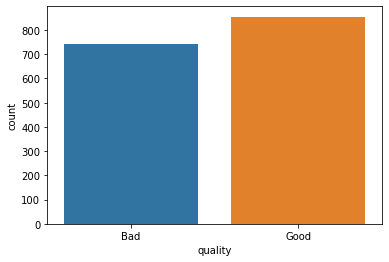

In [11]:
sns.countplot(wine_df["quality"])

# Build Machine Learning Classifier Model Using PyCaret


- **PyCaret** is a Python library that makes it easy to compare, train, evaluate, tune, and deploy machine learning models with only a few lines of code. 


- **PyCaret** automates machine learning workflows. It provides a wrapper for popular machine learning libraries such as Scikit-learn, XGBoost, LightGBM, CatBoost, and many more.


- One of the main benefits of **PyCaret** is that it compares the accuracy and other scores of different machine learning models with only a few lines of code. It gives the best performing machine learning model for our dataset reasonably quickly. 


In [12]:
from pycaret.classification import *

In [13]:
exp_clf01 = setup(data=wine_df, target="quality", session_id=123)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [14]:
#to change change features (e.g. categorical to numerical)

#exp_clf01 = setup(data = wine_df, target = 'quality',
#                  session_id = 123,
 #                 categorical_features = ['feature1', 'feature2'], 
    #              numerical_features = ['feature3', 'feature4'])

- When we want to build a machine learning model, most of the times we don’t know in advance which models that will give us the best performance according to our metrics. 


- With **PyCaret**, you’re able to compare the performance of different kinds of classification models with a single line of code.


In [15]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.8973,0.8384,0.8357,0.8364,0.6416,0.6429,0.1870
et,Extra Trees Classifier,0.8159,0.9044,0.8319,0.8302,0.8306,0.6290,0.6299,0.1250
xgboost,Extreme Gradient Boosting,0.8132,0.8799,0.8220,0.8327,0.8267,0.6242,0.6254,0.3910
lightgbm,Light Gradient Boosting Machine,0.8132,0.8849,0.8204,0.8346,0.8266,0.6242,0.6257,0.3580
gbc,Gradient Boosting Classifier,0.7855,0.8593,0.7990,0.8071,0.8018,0.5682,0.5703,0.1030
ridge,Ridge Classifier,0.7569,0.0000,0.7497,0.7910,0.7688,0.5131,0.5151,0.0090
lr,Logistic Regression,0.7507,0.8179,0.7480,0.7825,0.7642,0.5000,0.5015,0.9950
lda,Linear Discriminant Analysis,0.7489,0.8173,0.7513,0.7779,0.7635,0.4960,0.4974,0.0130
dt,Decision Tree Classifier,0.7444,0.7411,0.7809,0.7568,0.7684,0.4835,0.4841,0.0100
nb,Naive Bayes,0.7418,0.8043,0.7646,0.7615,0.7621,0.4798,0.4811,0.0100


- As you can see, it turns out that Random Forest classifier gives us the best performance in 5 out of 7 metrics. 

- Let’s say we want to use F1 score metrics for our wine classifier, then of course Random Forest classifier will give us the best performance.


Before we go further, let’s see whether we can improve the performance of the models by tuning our setup() function.


In [16]:
exp_clf02 = setup(data=wine_df, target="quality",
                session_id=123, normalize=True, transformation=True)

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Binary
3,Label Encoded,"Bad: 0, Good: 1"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


As you can see, we passed several additional parameters there to tune our setup:

- normalize — To transform our features by scaling them to a given range.

- transformation — To transform our features such that our data can be represented by normal distribution. This can be helpful for models like Logistic Regression, LDA, or Gaussian Native Bayes.



Also note that we use the same session_id as our previous setup() function. This is to make sure that all of the future improvements on the model are solely due to the change that we’ve implemented in this setup() function.


Let’s compare the models once again with our new setup.


In [17]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8231,0.9036,0.8402,0.8360,0.8375,0.6433,0.6444,0.1280
rf,Random Forest Classifier,0.8222,0.8976,0.8351,0.8380,0.8359,0.6418,0.6430,0.1470
lightgbm,Light Gradient Boosting Machine,0.8141,0.8835,0.8237,0.8337,0.8275,0.6260,0.6277,0.1180
xgboost,Extreme Gradient Boosting,0.8132,0.8799,0.8220,0.8327,0.8267,0.6242,0.6254,0.2990
gbc,Gradient Boosting Classifier,0.7873,0.8596,0.7991,0.8095,0.8030,0.5720,0.5741,0.0910
lr,Logistic Regression,0.7525,0.8201,0.7727,0.7719,0.7711,0.5015,0.5032,0.0100
qda,Quadratic Discriminant Analysis,0.7507,0.8123,0.7760,0.7679,0.7711,0.4972,0.4985,0.0070
ridge,Ridge Classifier,0.7498,0.0000,0.7595,0.7750,0.7659,0.4972,0.4990,0.0070
lda,Linear Discriminant Analysis,0.7498,0.8214,0.7595,0.7750,0.7659,0.4972,0.4990,0.0070
dt,Decision Tree Classifier,0.7444,0.7413,0.7793,0.7578,0.7680,0.4837,0.4844,0.0120


- As you can see, most of the metrics are slightly improved after we tuned the setup. 


- Before we tuned the setup, the **Accuracy** score of Extra Tree classifier was 0.8159. After we tuned the setup, it becomes 0.8231. 


# Extra Tree classifier

Based on this result, let’s build our Extra Tree classifier. We can do this with a single line of code.

In [18]:
et_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8304,0.9082,0.7869,0.8889,0.8348,0.6618,0.6670
1,0.8214,0.9190,0.8361,0.8361,0.8361,0.6400,0.6400
2,0.8482,0.9357,0.8525,0.8667,0.8595,0.6945,0.6946
3,0.8393,0.9037,0.8689,0.8413,0.8548,0.6749,0.6754
4,0.8304,0.8939,0.8689,0.8281,0.8480,0.6563,0.6573
5,0.8393,0.9248,0.8361,0.8644,0.8500,0.6770,0.6775
6,0.8125,0.9031,0.8525,0.8125,0.8320,0.6202,0.6211
7,0.7768,0.8720,0.8333,0.7692,0.8000,0.5484,0.5506
8,0.8036,0.8817,0.8167,0.8167,0.8167,0.6051,0.6051
9,0.8288,0.8943,0.8500,0.8361,0.8430,0.6549,0.6550


In [19]:
#We could also tune the hyperparameter automatically with tune_model() method.

#tuned_et_model = tune_model(et_model)

In [20]:
#print(tuned_et_model)

Next, you can evaluate your model by looking at the visualization of the ROC curve, feature importance, or confusion matrix of your model with also a single line of code.


In [21]:
evaluate_model(et_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

- As a final check, we can use our Extra Tree classifier to predict the test data that has been generated by PyCaret.

- As mentioned earlier, soon after we executed the setup() function at the very first step, PyCaret will automatically split our data into training data and test data. 

- All of the model performance and evaluation metrics that we’ve seen above are solely based on the training data.


To use the model to predict the test data, we can use the predict_model function.

In [22]:
predict_model (et_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7833,0.8852,0.8347,0.7667,0.7992,0.5649,0.5673


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,1.020581,-0.262296,0.879957,0.909533,-0.811347,-1.540063,-1.767548,-0.001569,0.179457,-0.026236,1.507610,Good,Good,0.89
1,0.803863,0.365869,0.069877,0.182416,0.169895,0.853209,1.990033,0.562903,-0.216541,-0.678425,-1.071247,Bad,Bad,0.94
2,-0.548122,1.883332,-0.893325,-0.877416,-0.243956,0.627023,0.590837,-0.012133,0.309834,-0.575997,-1.403918,Bad,Bad,0.81
3,0.107496,-1.862383,0.790677,-0.626785,-0.545447,-0.666586,-1.164982,-1.619910,-0.619242,-0.783883,1.558460,Good,Good,0.85
4,-0.094433,-0.848963,-0.143037,-0.877416,-0.079076,0.853209,0.377183,-0.235514,-0.150025,0.344380,-1.234925,Bad,Bad,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-0.548122,-0.140170,0.322105,-0.184957,-1.025574,1.330907,0.533355,0.282230,-0.017590,0.205903,-0.205644,Good,Good,1.00
476,1.829882,-0.021413,1.097942,0.007672,0.466399,-1.351650,-1.357754,1.774646,-0.754683,-2.001296,-0.760154,Bad,Bad,1.00
477,-0.629846,-0.781016,0.222956,-0.877416,-0.301560,1.330907,0.934478,0.056549,0.761128,-0.287096,-0.912961,Good,Good,1.00
478,0.936322,-1.341851,0.654246,-1.148800,-1.025574,-1.735218,-1.697012,-1.047378,-1.095523,-0.476619,1.112168,Good,Good,0.89


# Finally, let’s save our Extra Tree classifier model.


In [23]:
save_model(et_model, model_name="extra_tree_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='quality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

- And that’s it for model building with **PyCaret**. 

- After this you should have a pickle file called ‘extra_tree_model’ in your working directory. 

- We will use this saved model to build a wine classifier web app with **Streamlit**.


# Build the Web App with Streamlit


Now it’s time for us to build our wine classifier web app. In this post, we’re going to use **Streamlit** to build the web app as it is more beginner friendly than Flask. 

- This is available in a different .py file.

# References

This work is inspired by Ruben Winastwan's article - PyCaret and Streamlit: How to Create and Deploy Data Science Web App - https://towardsdatascience.com/pycaret-and-streamlit-how-to-create-and-deploy-data-science-web-app-273d205271a3

PyCaret - https://github.com/pycaret/pycaret 

Red wine quality dataset - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
